In [0]:
!nvidia-smi

Sat Jan 18 06:25:32 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!wget https://huseinhouse-storage.s3-ap-southeast-1.amazonaws.com/speech-sg/test-wav.tgz
!tar -zxf test-wav.tgz

--2020-01-18 06:37:29--  https://huseinhouse-storage.s3-ap-southeast-1.amazonaws.com/speech-sg/test-wav.tgz
Resolving huseinhouse-storage.s3-ap-southeast-1.amazonaws.com (huseinhouse-storage.s3-ap-southeast-1.amazonaws.com)... 52.219.124.95
Connecting to huseinhouse-storage.s3-ap-southeast-1.amazonaws.com (huseinhouse-storage.s3-ap-southeast-1.amazonaws.com)|52.219.124.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1373100976 (1.3G) [binary/octet-stream]
Saving to: ‘test-wav.tgz.1’

test-wav.tgz.1      100%[===================>]   1.28G  95.4MB/s    in 14s     

2020-01-18 06:37:43 (95.5 MB/s) - ‘test-wav.tgz.1’ saved [1373100976/1373100976]



In [0]:
from glob import glob
import pandas as pd

wavs = glob('test-wav/*.WAV')
csv = 'test-wav/notes.csv'

In [0]:
df = pd.read_csv(csv)
df.head()

,wav_filename,wav_filesize,transcript
0,221930043.WAV,219052,b r sreenivasan ho see beng and sai hua kuan
1,221930091.WAV,172204,p c show kiki and kinohimitsu
2,221931702.WAV,149804,wantan mee is a traditional local cuisine
3,221930052.WAV,195276,antonia recently opened a new hainanese curry ...
4,221931492.WAV,155372,three two seven four nine six three zero


In [0]:
import IPython.display as ipd
ipd.Audio('test-wav/221930091.WAV')

In [0]:
df.shape

(13189, 3)

In [0]:
sample_500 = df.sample(500)
sample_500.shape

(500, 3)

In [0]:
!pip3 install youtokentome

     |████████████████████████████████| 1.7MB 30.2MB/s 


In [0]:
import youtokentome as yttm
model_path = "example.model"

labels = sample_500['transcript'].tolist()
with open('labels.txt', 'w') as fopen:
  fopen.write('\n'.join(labels))

  yttm_model = yttm.BPE.train(data='labels.txt', 
               vocab_size=1000, model=model_path)

In [0]:
yttm_model.encode(['i want to makan ciken'], 
                  output_type=yttm.OutputType.SUBWORD)

[['▁i', '▁want', '▁to', '▁m', 'ak', 'an', '▁c', 'ik', 'en']]

In [0]:
labels_subwords = yttm_model.encode(labels, 
                  output_type=yttm.OutputType.SUBWORD)

In [0]:
labels_id = yttm_model.encode(labels, 
                  output_type=yttm.OutputType.ID)

labels_subwords[0], labels_id[0]

(['▁number',
  '▁sequence',
  '▁is',
  '▁t',
  '▁six',
  '▁two',
  '▁nine',
  '▁eight',
  '▁four',
  '▁three',
  '▁five',
  '▁e',
  '▁and',
  '▁date',
  '▁of',
  '▁birth',
  '▁is',
  '▁three',
  '▁june',
  '▁two',
  '▁zero',
  '▁one',
  '▁seven'],
 [213,
  223,
  73,
  41,
  133,
  159,
  123,
  131,
  129,
  142,
  158,
  91,
  46,
  224,
  105,
  228,
  73,
  142,
  948,
  159,
  173,
  149,
  136])

In [0]:
import librosa

In [0]:
w, sr = librosa.load('test-wav/221930091.WAV')
w.shape

(118629,)

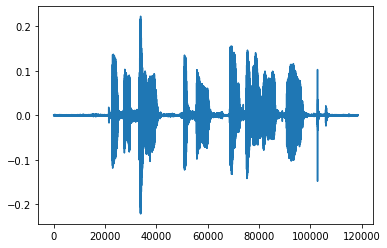

In [0]:
import matplotlib.pyplot as plt
plt.plot(w)

In [0]:
import numpy as np

sampling_rate = 22050
n_fft = 2048
frame_shift = 0.0125
frame_length = 0.05
hop_length = int(sampling_rate * frame_shift)
win_length = int(sampling_rate * frame_length)
n_mels = 80

In [0]:
def get_spectrogram(fpath):
    y, sr = librosa.load(fpath, sr = sampling_rate)
    D = librosa.stft(
        y = y, 
        n_fft = n_fft, 
        hop_length = hop_length, win_length = win_length
    )
    magnitude = np.abs(D)
    power = magnitude ** 2
    S = librosa.feature.melspectrogram(S = power, 
                                       n_mels = n_mels)
    
    return np.transpose(S.astype(np.float32))

    # in db scale
    # return np.transpose(np.log10(magnitude.astype(np.float32)) * 10)

spec = get_spectrogram('test-wav/221930091.WAV')
spec.shape

(432, 80)

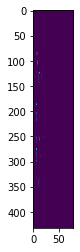

In [0]:
plt.imshow(spec)

In [0]:
from tqdm import tqdm

mels = []
for i in tqdm(range(len(sample_500))):
  filename = sample_500['wav_filename'].iloc[i]
  spec = get_spectrogram('test-wav/%s'%(filename))
  mels.append(spec)

100%|██████████| 500/500 [01:44<00:00,  5.56it/s]


In [0]:
mels[0].shape, len(labels_subwords[0])

((826, 80), 23)

In [0]:
import tensorflow as tf

In [0]:
class model:
  def __init__(self, learning_rate)
  self.X = tf.placeholder(tf.float32,
                          (None, None, mel[0].shape[1]))
  self.label = tf.placeholder(tf.int32,[None, None])

AttributeError: ignored